Data Overview
---

Browse load sources, how they have been compiled, filtered, etc.

The starting point here is CSV files which for the most part have been processed in the
same way the Emily processed data for the load study.  Since the model
needs to track year-to-year differences, less averaging is done, and
monthly climatologies are adapted to longer-term trends where the data
supports that.


In [88]:
%matplotlib notebook

In [89]:
import os
import utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lp_filter
import glob
from collections import OrderedDict as odict


In [90]:
csvs=glob.glob('synth_inputs/*.csv')

sites=[os.path.basename(fn).replace('.csv','')
       for fn in csvs] 

# gather all unique column names from all CSVs
all_cols=[]
for fn in csvs:
    cols=pd.read_csv(fn,parse_dates=['Date'],index_col='Date',nrows=10).columns.values
    all_cols.append(cols)

cols=[col for col in np.unique(np.concatenate(all_cols))
      if 'flag' not in col]
cols

['NH3 mg/L N',
 'NO2 mg/L N',
 'NO3 mg/L N',
 'PO4 mg/L P',
 'SKN mg/L N',
 'TDN mg/L N',
 'TDP mg/L P',
 'TKN mg/L N',
 'TP mg/L P',
 'TSS mg/L',
 'flow ft3/s',
 'flow mgd',
 'pH',
 'temperature degC',
 'urea* mg/L N']

<IPython.core.display.Javascript object>


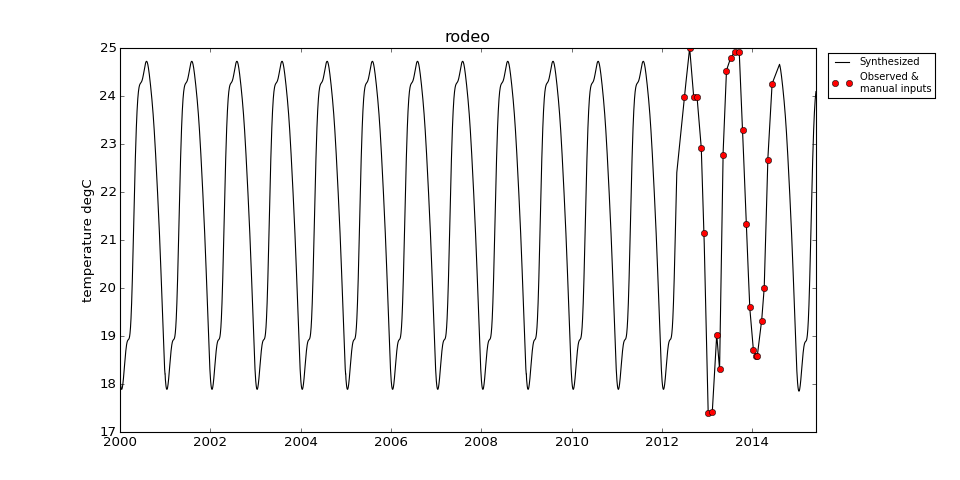

None

In [91]:
def plot_synth(site,col):
    fn=os.path.join("synth_inputs","%s.csv"%site)
    df=pd.read_csv(fn,parse_dates=['Date'],index_col='Date')

    flag=col+" flag"
    units=col.split(' ')[1]

    fig,ax=plt.subplots(1,1,figsize=(12,6),sharex=True,sharey=True)
    if col not in df.columns:
        ax.text(0.5,0.5,"%s doesn't have %s"%(site,col),
                transform=ax.transAxes,ha='center',va='center')
    else:
        ax.plot_date(df.index,df[col],'k-',label='Synthesized')
        sel=(df[flag]==1)
        ax.plot_date(df[sel].index,df[sel][col],'ro',label='Observed &\nmanual inputs')
        ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize=9)
    ax.set_ylabel(col)
    ax.set_title(site)
    
    fig.subplots_adjust(right=0.85)
    
from ipywidgets import interact
interact(plot_synth,site=sites,col=cols)

Notes
---

**Flow**
Calistoga: values are low, not worth worrying about, but the seasonal cycle is not so great

False Sacramento: has a negative blip, start of June 2004.